In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import logging
from plotnine import *
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.insert(0,'/home/_shared/_projects/nucl_gmx')
from nucl_sys import systems as sys
import pynucl

_ColormakerRegistry()

In [3]:
logging.basicConfig(level=logging.DEBUG)

In [4]:
p=pynucl.nucltrj(**sys['1kx5_ntm_opc'],time=(0,None,1),fullseqs='1KX5')

DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topologyattrs.Atomnames object at 0x7f823cb915f8> to topology
DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topologyattrs.AltLocs object at 0x7f823cb91630> to topology
DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topologyattrs.RecordTypes object at 0x7f82c41e3390> to topology
DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topologyattrs.Atomids object at 0x7f823cb8e828> to topology
DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topologyattrs.Tempfactors object at 0x7f823cb916d8> to topology
DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topologyattrs.Occupancies object at 0x7f823cb91710> to topology
DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topologyattrs.Atomtypes object at 0x7f823cb916a0> to topology
DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topo

DEBUG:pynucl.nucl_ref_frame_aln:identified bp = 147
DEBUG:DNAtools.DNAtools:Running findpair on the original input
DEBUG:DNAtools.DNAtools:created temporary directory /tmp/tmpkged3lyg
DEBUG:DNAtools.DNAtools:Writing coords to input.pdb
DEBUG:DNAtools.DNAtools:OUT:
DEBUG:DNAtools.DNAtools:ERR:
handling file <input.pdb>

Time used: 00:00:00:00

DEBUG:DNAtools.DNAtools:created temporary directory/tmp/tmpgkzwy77y
DEBUG:DNAtools.DNAtools:Writing coords to input.pdb
DEBUG:DNAtools.DNAtools:Writing provided find pair file
DEBUG:DNAtools.DNAtools:Writing new find pair file
DEBUG:DNAtools.DNAtools:OUT:
......Processing structure #1: <output>......
[i] missing ' P  ' atom : residue name ' DA', chain I, number [ -73 ]
[i] missing ' OP1' atom : residue name ' DA', chain I, number [ -73 ]
[i] missing ' OP2' atom : residue name ' DA', chain I, number [ -73 ]
[i] missing ' P  ' atom : residue name ' DA', chain J, number [ -73 ]
[i] missing ' OP1' atom : residue name ' DA', chain J, number [ -73 ]
[i]

DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topologyattrs.Atomids object at 0x7f823bd9f0b8> to topology
DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topologyattrs.Tempfactors object at 0x7f823bd20f28> to topology
DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topologyattrs.Occupancies object at 0x7f823bd20f60> to topology
DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topologyattrs.Atomtypes object at 0x7f823c135e80> to topology
DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topologyattrs.Masses object at 0x7f823c167eb8> to topology
DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topologyattrs.Resnums object at 0x7f823bd9ff28> to topology
DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topologyattrs.Resids object at 0x7f823bd9feb8> to topology
DEBUG:MDAnalysis.core.universe:_process_attr: Adding <MDAnalysis.core.topologyattr

In [5]:
p.seqs['A']['resid_start']

38

In [6]:
p.u.select_atoms('segid A E and name CA and resid 110').positions

array([[ 3.9013672, 18.85931  , -1.1781815],
       [-3.7837048, 18.877535 ,  1.1898429]], dtype=float32)

In [7]:
#p.view()

### Distance

In [8]:
d=pynucl.a_geom(p,'dist',('H3 and side1','H4 and side2'))

INFO:numexpr.utils:Note: NumExpr detected 40 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.
DEBUG:matplotlib.font_manager:findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=8.8.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sa

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXIntegralsUpD' (STIXIntegralsUpD-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'UnDotum' (UnDotum.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Garuda' (Garuda-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comfortaa' (Comfortaa-Light.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'EB Garamond' (EBGaramond12-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typist' (TlwgTypist-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typist' (TlwgTypist.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Loma' (Loma-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotli

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gentium' (Gentium-R.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Go' (Go-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Roboto Condensed' (RobotoCondensed-BoldItalic.ttf) italic normal bold condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'GFS Gazis' (GFSGazis.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'EB Garamond Initials Fill1' (EBGaramond-InitialsF1.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MathJax_Math' (MathJax_Math-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'EB Garamond' (EBGaramond12-Regular.ttf) normal normal regular normal>

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Open Sans' (OpenSans-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Go Mono' (Go-Mono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstPoster' (KacstPoster.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans CJK JP' (NotoSansCJK-Bold.ttc) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Berenis ADF Pro' (BerenisADFPro-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu' (Ubuntu-BI.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MathJax_Caligraphic' (MathJax_Caligraphic-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Kannada' (NotoSerifKannada-Regular.ttf) normal normal 400 normal>)

DEBUG:matplotlib.font_manager:findfont: score(<Font 'AR PL SungtiL GB' (gbsn00lp.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gillius ADF No2' (GilliusADFNo2-CondItalic.otf) italic normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Hebrew' (NotoSansHebrew-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Go Mono' (Go-Mono-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kinnari' (Kinnari-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Thai UI' (NotoSansThaiUI-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Oblique' (UniversalisADFStd-Oblique.otf) obliqu

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Berenis ADF Pro SC' (BerenisADFProSC-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIX' (STIX-BoldItalic.otf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Naskh Arabic' (NotoNaskhArabic-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Armenian' (NotoSansArmenian-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Hebrew' (NotoSerifHebrew-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Armenian' (NotoSansArmenian-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Symbola' (Sym

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kinnari' (Kinnari-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Mono' (TlwgMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'GFS Didot' (GFSArtemisiaBoldIt.otf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Linux Libertine O' (LinLibertine_RZI.otf) italic normal semibold normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'GFS Artemisia' (GFSArtemisiaIt.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sawasdee' (Sawasdee.ttf) normal normal 400 normal>) = 10.05
DEBUG:matp

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Display' (NotoSansDisplay-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gillius ADF' (GilliusADF-BoldCondItalic.otf) italic normal bold condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Gujarati' (NotoSansGujarati-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Thai' (NotoSansThai-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Naskh Arabic UI' (NotoNaskhArabicUI-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Go' (Go-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Asana Math' (Asana-Math.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Bengali' (NotoSe

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Roboto' (Roboto-BlackItalic.ttf) italic normal black normal>) = 11.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Cabin' (Cabin-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'UnDinaru' (UnDinaru.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu' (Ubuntu-M.ttf) normal normal medium normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Khmer' (NotoSansKhmer-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MathJax_Size1' (MathJax_Size1-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Devanagari UI' (NotoSansDevanagariUI-Regular.ttf) normal normal regular n

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Accanthis ADF Std' (AccanthisADFStd-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gentium Book Basic' (GenBkBasR.ttf) normal normal book normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gillius ADF' (GilliusADF-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Caladea' (Caladea-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Linux Biolinum O' (LinBiolinum_RI.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Khmer' (NotoSerifKhmer-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Baekmuk Gulim' (gulim.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Dyuthi' (Dyuthi.ttf) normal normal 400 normal>) = 10.05
DEBUG:

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Roboto' (Roboto-Light.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arimo' (Arimo-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gentium' (Gentium-I.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typo' (TlwgTypo-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MathJax_Vector' (MathJax_Vector-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Arabic UI' (NotoSansArabicUI-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tifinagh' (NotoSansTifinagh-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Linux Libertine O' (LinLibertine_R.otf) norm

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'EB Garamond Initials' (EBGaramond-Initials.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXIntegralsD' (STIXIntegralsD-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Devanagari' (Lohit-Devanagari.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'EB Garamond SC' (EBGaramondSC12-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Laksaman' (Laksaman-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tamil' (NotoSansTamil-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FreeSerif' (FreeSerifBold.otf) normal

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Georgian' (NotoSansGeorgian-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Samyak Gujarati' (Samyak-Gujarati.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typewriter' (TlwgTypewriter-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Pothana2000' (Pothana2000.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Garuda' (Garuda.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Thaana' (NotoSansThaana-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comfortaa' (Comfortaa-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Arabic' (NotoSansArabic-Regular.ttf) normal nor

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu' (Ubuntu-L.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Umpush' (Umpush-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Roboto' (Roboto-MediumItalic.ttf) italic normal medium normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Junicode' (Junicode-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'EB Garamond' (EBGaramond12-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Baekmuk Batang' (batang.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typist' (TlwgTypist-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'UnJamoBatang' (UnJamoBatang.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Bold.ttf) normal normal bold condensed>) = 10.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Gurmukhi' (Lohit-Gurmukhi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXVariants' (STIXVariants-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Malayalam' (NotoSerifMalayalam-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FreeSans' (FreeSans.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans' (NotoSans-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Garuda' (Garuda-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Telugu' (Lohit-Telugu.ttf) normal normal

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Tamil Classical' (Lohit-Tamil-Classical.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lobster Two' (lobster.otf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Display' (NotoSerifDisplay-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Cabin' (Cabin-BoldItalic.otf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Georgian' (NotoSerifGeorgian-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'UnJamoSora' (UnJamoSora.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Berenis ADF Pro SC' (BerenisADFProSC-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Go Mono' (Go-Mono-Bold.ttf) normal norm

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu Condensed' (Ubuntu-C.ttf) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Norasi' (Norasi-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lobster Two' (LobsterTwo-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'AR PL KaitiM Big5' (bkai00mp.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Linux Libertine O' (LinLibertine_RBI.otf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Samanata' (samanata.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typo' (TlwgTypo-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Arabic' (NotoSansArabic-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Ol Chiki' (NotoSansOlChiki-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'IPAMincho' (ipam.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kinnari' (Kinnari-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Malayalam UI' (NotoSansMalayalamUI-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tibetan' (NotoSansTibetan-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tinos' (Tinos-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gentium Basic' (GenBasI.ttf) italic norma

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kinnari' (Kinnari.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Khmer' (NotoSerifKhmer-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Go Medium' (Go-Medium-Italic.ttf) italic normal medium normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Amiri' (amiri-bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif' (NotoSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Roboto Condensed' (RobotoCondensed-LightItalic.ttf) italic normal light condensed>) = 11.44
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lato' (Lato-MediumItalic.ttf) italic normal medium normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Roboto' (Roboto-Medium.ttf) normal normal medium normal>) = 10.145

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Kannada' (NotoSansKannada-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gargi' (Gargi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Umpush' (Umpush-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans CJK JP' (NotoSansCJK-Regular.ttc) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MathJax_Main' (MathJax_Main-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MathJax_Main' (MathJax_Main-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Osage' (NotoSansOsage-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Malayalam' (NotoSerifMalayalam-Regular.ttf) nor

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Open Sans' (OpenSans-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Chilanka' (Chilanka-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Mono' (TlwgMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Cabin' (Cabin-Medium.otf) normal normal medium normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Roboto Condensed' (RobotoCondensed-Light.ttf) normal normal light condensed>) = 10.44
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Caladea' (Caladea-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXVariants' (STIXVariants-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lato' (Lato-ThinItalic.ttf) italic normal 400 normal>) = 11.05

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Gurmukhi' (NotoSansGurmukhi-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Gurmukhi UI' (NotoSansGurmukhiUI-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Accanthis ADF Std No3' (AccanthisADFStdNo3-BoldItalic.otf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Samyak Tamil' (Samyak-Tamil.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Open Sans' (OpenSans-Light.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Sinhala' (NotoSerifSinhala-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Myanmar' (Noto

DEBUG:matplotlib.font_manager:findfont: score(<Font 'MathJax_Math' (MathJax_Math-BoldItalic.otf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Cabin' (Cabin-SemiBoldItalic.otf) italic normal semibold normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MathJax_Main' (MathJax_Main-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FreeSans' (FreeSansBold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Amiri Quran Colored' (amiri-quran-colored.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Kayah Li' (NotoSansKayahLi-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Accanthis ADF Std No2' (AccanthisADFStdNo2-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FreeMono' (Fre

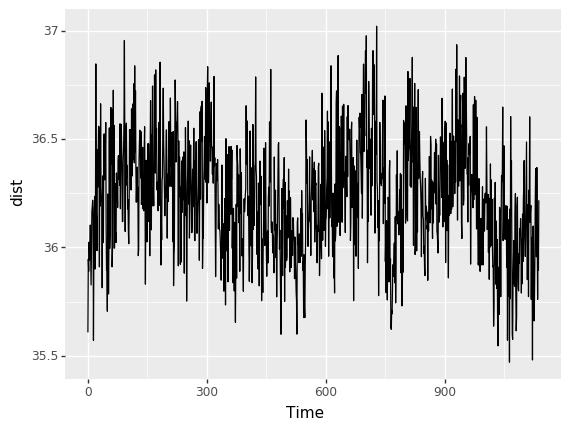

<ggplot: (8762332912802)>

In [9]:

(ggplot(d.df_series,aes(x='Time',y='dist'))+geom_line())

## RMSD

In [10]:
r=pynucl.a_geom(p,'rmsd',('H3 and side1 and alpha2'),rmsd_superposition=False)

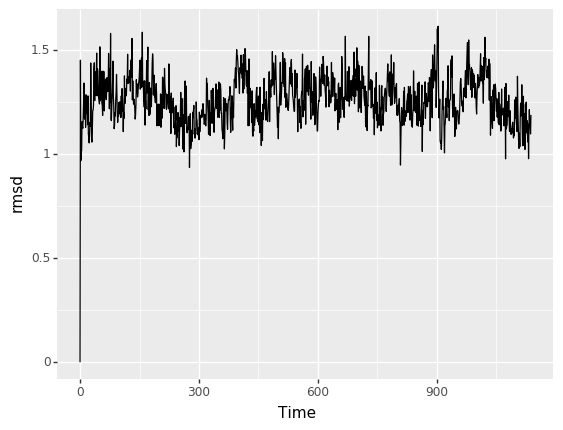

<ggplot: (8762333173575)>

In [11]:
(ggplot(r.df_series,aes(x='Time',y='rmsd'))+geom_line())

In [12]:
rt=pynucl.a_geom(p,'rmsd',('H3 and side1 and alpha2'),rmsd_superposition=True)

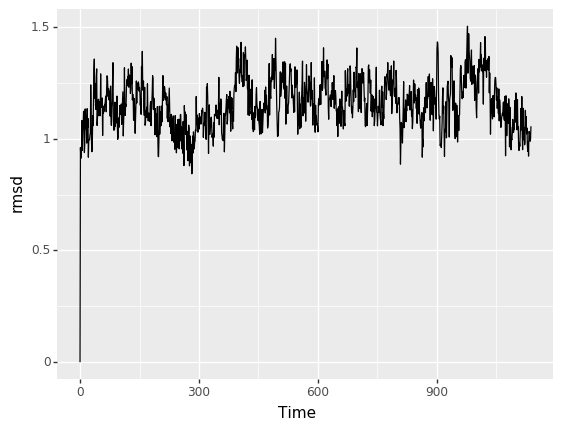

<ggplot: (-9223363274521602602)>

In [13]:
(ggplot(rt.df_series,aes(x='Time',y='rmsd'))+geom_line())

### RMSF

Explanation:
RMSF is root-mean-squared fluctuations of an atom, i.e. standard deviation of atomic positions in the trajectory.
std(d), where d is the deviation.


We can calculate coords and sum up stdev of x,y,z

In [14]:
rmsf=pynucl.a_geom(p,'coord',('H3 and side1 and alpha2 and name CA'),rmsd_superposition=False,sel_split='resid')

In [15]:
rmsf.df_std['rmsf']=rmsf.df_std['coord'].apply(np.linalg.norm)

DEBUG:pynucl.plot1d:Starting resid 38
DEBUG:matplotlib.font_manager:findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=13.2.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymBol.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 0.33499999999999996
DEBUG:matplotlib.font_manager:findfont: score(<Font '

DEBUG:matplotlib.font_manager:findfont: score(<Font 'UnDotum' (UnDotum.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Garuda' (Garuda-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Comfortaa' (Comfortaa-Light.ttf) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'EB Garamond' (EBGaramond12-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typist' (TlwgTypist-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typist' (TlwgTypist.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Loma' (Loma-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Go Medium' (Go-Medium.ttf) normal normal medium normal>) = 10.145
DEBUG:matplotlib.font_manager:findfon

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Go' (Go-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Roboto Condensed' (RobotoCondensed-BoldItalic.ttf) italic normal bold condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'GFS Gazis' (GFSGazis.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'EB Garamond Initials Fill1' (EBGaramond-InitialsF1.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Carlito' (Carlito-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MathJax_Math' (MathJax_Math-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'EB Garamond' (EBGaramond12-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Loma' (Loma-Bold.ttf) normal normal bold normal>) 

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Go Mono' (Go-Mono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'KacstPoster' (KacstPoster.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans CJK JP' (NotoSansCJK-Bold.ttc) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Berenis ADF Pro' (BerenisADFPro-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu' (Ubuntu-BI.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MathJax_Caligraphic' (MathJax_Caligraphic-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Kannada' (NotoSerifKannada-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Manjari' (Manjari-Thin.otf) normal normal 400 normal>) = 10

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gillius ADF No2' (GilliusADFNo2-CondItalic.otf) italic normal 400 condensed>) = 11.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Hebrew' (NotoSansHebrew-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Go Mono' (Go-Mono-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kinnari' (Kinnari-Italic.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Thai UI' (NotoSansThaiUI-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Oblique' (UniversalisADFStd-Oblique.otf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'GFS BodoniClassic' (GFSBodoniClassic.o

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIX' (STIX-BoldItalic.otf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Naskh Arabic' (NotoNaskhArabic-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Armenian' (NotoSansArmenian-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Hebrew' (NotoSerifHebrew-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Armenian' (NotoSansArmenian-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Symbola' (Symbola_hint.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUnicode-Bo

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Mono' (TlwgMono.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'GFS Didot' (GFSArtemisiaBoldIt.otf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Linux Libertine O' (LinLibertine_RZI.otf) italic normal semibold normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'GFS Artemisia' (GFSArtemisiaIt.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Sawasdee' (Sawasdee.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXIntegralsSm' (STIXIntegralsSm-Bold.otf) normal normal bold normal>) = 1

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gillius ADF' (GilliusADF-BoldCondItalic.otf) italic normal bold condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Gujarati' (NotoSansGujarati-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Thai' (NotoSansThai-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Naskh Arabic UI' (NotoNaskhArabicUI-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Go' (Go-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Asana Math' (Asana-Math.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Bengali' (NotoSerifBengali-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Liberation Mono' (Liberat

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Cabin' (Cabin-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'UnDinaru' (UnDinaru.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ubuntu' (Ubuntu-M.ttf) normal normal medium normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Khmer' (NotoSansKhmer-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MathJax_Size1' (MathJax_Size1-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Devanagari UI' (NotoSansDevanagariUI-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Khmer UI' (NotoSansKhmerUI-Bold.ttf) normal n

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gentium Book Basic' (GenBkBasR.ttf) normal normal book normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gillius ADF' (GilliusADF-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Caladea' (Caladea-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Linux Biolinum O' (LinBiolinum_RI.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Khmer' (NotoSerifKhmer-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Baekmuk Gulim' (gulim.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Dyuthi' (Dyuthi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Serif Display' (NotoSerifDisplay-BoldItalic.ttf) italic normal bold normal>) = 11.33

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gentium' (Gentium-I.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tlwg Typo' (TlwgTypo-BoldOblique.ttf) oblique normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MathJax_Vector' (MathJax_Vector-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Arabic UI' (NotoSansArabicUI-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tifinagh' (NotoSansTifinagh-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Linux Libertine O' (LinLibertine_R.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'GFS Solomos' (GFSSolomos.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'IPAexGothic' (fonts-japanese-go

DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXIntegralsD' (STIXIntegralsD-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lohit Devanagari' (Lohit-Devanagari.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'EB Garamond SC' (EBGaramondSC12-Regular.otf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Laksaman' (Laksaman-Bold.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Tamil' (NotoSansTamil-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'FreeSerif' (FreeSerifBold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Universalis ADF Std' (UniversalisADFStd-Cond.otf) normal normal 400 condensed>) = 10.25
DEBUG:matplotlib.font_manager:findfont: score(<Font 'AnjaliOldLipi' (AnjaliOldLipi.

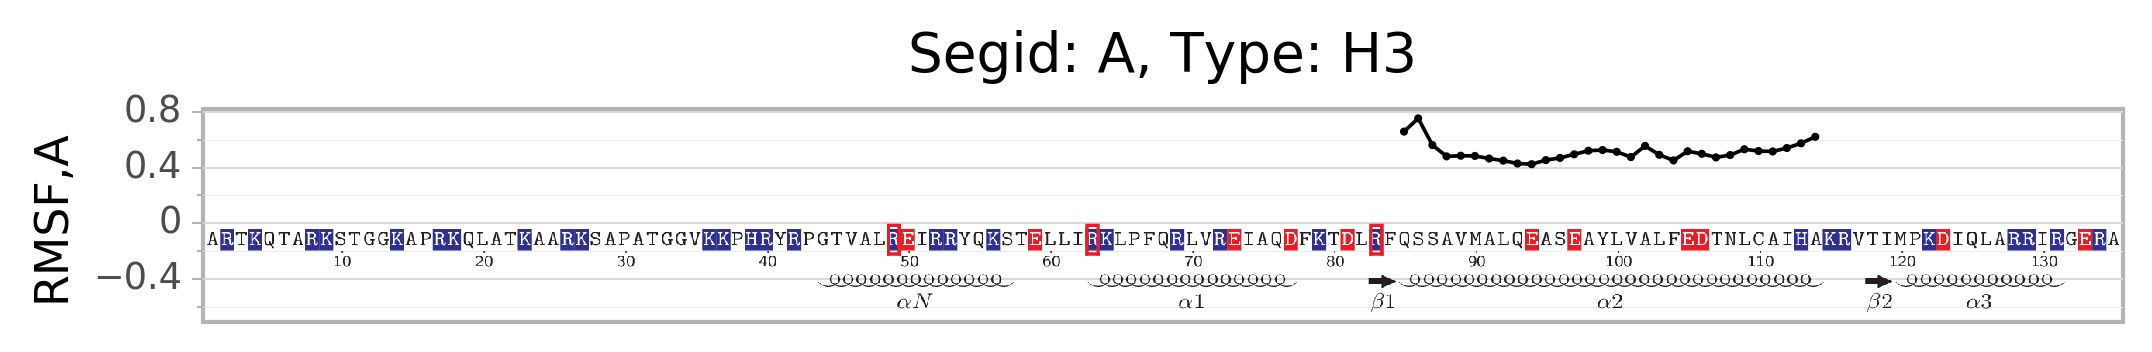

<ggplot: (-9223363274521609093)>

In [16]:
(pynucl.plot_line(rmsf.df_std,p,column='rmsf',dpi=300,debug=False,feature_types=['helix','-->','frameblock'])+ylab('RMSF,A'))

## Vector data, plotting coord

In [17]:
c=pynucl.a_geom(p,'coord',('H3 and alpha2 and name CA'),rmsd_superposition=False,sel_split='atom')

In [ ]:
(pynucl.plot_coord(c.df_series,plane='xy'))